In [11]:

'''
S0501 - Selected Characteristics of the Native and Foreign-born Populations

American Community Survey 
Change in Geographies 
Change in Year
Change in Race

Use estimated variables:


Questions:
Changes in native/ foreign born:
Occupation
Industry 
Earnings
- By geography, By year, By race 


'''
import requests
import json
import pandas as pd

def find_data(name, variable):
    api_root = "https://api.census.gov/data"
    dataset = "/2021/acs/acs1/subject"
    #change in geographic name & variables 
    chg_variables = "?get=%s,%s&for=state:*" %(name, variable)
    request_url = api_root + dataset + chg_variables
    print(request_url)
    http_response = requests.get(request_url)
    if http_response.status_code == 200:
        data = json.loads(http_response.text)
        return(data)
    else:
        print(http_response.status_code)

In [35]:
#create a function that makes a list of variables 
#function adds one to the variable number plus 'E' until all variabes listed 

#non US Citizen Base
Base_var = 'S0501_C05_0%sE'

def get_all_variables(variable, start, end):
    variables = ''
    for number in range(start, end +1 ):
        single_var = variable %(number) 
        variables += single_var +','
    fixed = variables[:-1]
    return fixed

In [36]:
#Industry variables for non US citizens 
Industry_var = get_all_variables(Base_var, 66, 78)
print(Industry_var)


S0501_C05_066E,S0501_C05_067E,S0501_C05_068E,S0501_C05_069E,S0501_C05_070E,S0501_C05_071E,S0501_C05_072E,S0501_C05_073E,S0501_C05_074E,S0501_C05_075E,S0501_C05_076E,S0501_C05_077E,S0501_C05_078E


https://api.census.gov/data/2021/acs/acs1/subject?get=NAME,S0501_C05_066E,S0501_C05_067E,S0501_C05_068E,S0501_C05_069E,S0501_C05_070E,S0501_C05_071E,S0501_C05_072E,S0501_C05_073E,S0501_C05_074E,S0501_C05_075E,S0501_C05_076E,S0501_C05_077E,S0501_C05_078E&for=state:*
['Alabama', 'Puerto Rico', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Alaska']


"\n'Retail Trade' : 'Pennsylvanania', 30%\n'Manifacturing': 'Virginia', 15%\n\n"

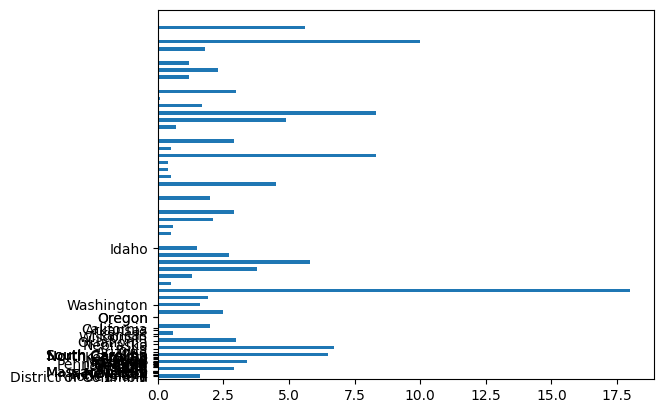

In [77]:
#all industry data for each state 
#returns state followed by percent of non US citizens working in each industry  
industry_data = find_data('NAME', Industry_var)
#print(industry_data)   
state_industry_data = industry_data[1:] #industry data without undescriptive variables in the beginning 
variables_industry_data = industry_data[:1][0]
#print(variables_industry_data)   
#print(state_industry_data) 
'''
Returns: 

['Alabama', '1.6', '25.7', '21.7', '1.4', '7.2', '2.5', '0.7', '2.8', '11.6', '13.0', '5.5', '5.2', '1.1', '01'],
['Puerto Rico', '2.9', '19.3', '4.5', '2.5', '10.9', '1.8', '1.2', '3.7', '7.5', '12.2', '11.5', '21.9', '0.0', '72']

Every list contains percentage in industry per state (13 industries, 13 percentages)
'''
#Give descriptive title names to variables  
Industry_var_dict = {'State':'State','S0501_C05_066E':'Agriculture & Farming', 'S0501_C05_067E':'Construction',
                     'S0501_C05_068E':'Manufacturing', 'S0501_C05_069E':'Wholesale Trade',
                     'S0501_C05_070E':'Retail Trade','S0501_C05_071E':'Transportation & Warehousing & Utilities',
                     'S0501_C05_072E':'Information','S0501_C05_073E':'Finance & Insurance & Real Estate & Rental',
                     'S0501_C05_074E':'Professional, Scientific, & Management','S0501_C05_075E':'Educational Services & Healthcare',
                     'S0501_C05_076E':'Arts, Entertainment, & Recreation','S0501_C05_077E':'Other Services',
                     'S0501_C05_078E':'Public Administration','State_num':'State Code'}     
human_vars = list(Industry_var_dict.values())
#print(human_vars) #descriptive variables names 


state_ind_df = pd.DataFrame(state_industry_data)


state_ind_df.columns = human_vars
#print(state_ind_df)
state_ind_df['Agriculture & Farming'] = state_ind_df['Agriculture & Farming'].astype('float64')


cols = state_ind_df.columns.values.tolist()
for col in cols[1:]:
    state_ind_df[col] = state_ind_df[col].astype('float64')

    
#state_ind_df['Agriculture & Farming'].plot(kind='barh', label=state_ind_df['State'])

agr_series = state_ind_df['Agriculture & Farming']
#print(agr_series)
state_names = list(state_ind_df['State'])
print(state_names)

agr_plot = agr_series.plot(kind='barh')

agr_plot.set_yticks(agr_series, labels=state_names)

#print(state_ind_df)


'''
'Retail Trade' : 'Pennsylvanania', 30%
'Manifacturing': 'Virginia', 15%

'''



In [137]:
#create a function that finds the max value for each industry and prints out the state name 
#Set State name as key, variables as list of values 
#sort through all values 

def find_state_with_popular_industry(state_data):
    '''
    Takes in a dictionary keyed by states, values are a percentage as a string 
    Returns the key (state name) of the highest value 
        Chooses first in a tie 
    '''
    max_val = 0 
    
    for percent in state_data:
        print(state_data[percent])
            
find_state_with_popular_industry(industry_state_dict)

{'Alabama': '1.1', 'Puerto Rico': '0.0', 'Arizona': '1.3', 'Arkansas': '0.9', 'California': '1.4', 'Colorado': '1.1', 'Connecticut': '1.0', 'Delaware': '1.3', 'District of Columbia': '11.9', 'Florida': '1.1', 'Georgia': '0.8', 'Hawaii': '4.6', 'Idaho': '0.8', 'Illinois': '1.0', 'Indiana': '1.0', 'Iowa': '1.2', 'Kansas': '1.2', 'Kentucky': '0.5', 'Louisiana': '1.7', 'Maine': None, 'Maryland': '4.7', 'Massachusetts': '0.5', 'Michigan': '0.7', 'Minnesota': '1.8', 'Mississippi': None, 'Missouri': '0.4', 'Montana': None, 'Nebraska': '1.5', 'Nevada': '0.8', 'New Hampshire': '1.2', 'New Jersey': '1.0', 'New Mexico': '3.0', 'New York': '2.1', 'North Carolina': '0.6', 'North Dakota': None, 'Ohio': '0.7', 'Oklahoma': '0.7', 'Oregon': '2.0', 'Pennsylvania': '0.9', 'Rhode Island': '0.4', 'South Carolina': '1.4', 'South Dakota': None, 'Tennessee': '1.4', 'Texas': '0.8', 'Utah': '0.9', 'Vermont': None, 'Virginia': '3.9', 'Washington': '1.2', 'West Virginia': None, 'Wisconsin': '0.8', 'Wyoming': None

In [68]:
max_state = ''
max_val = 0.0 
for ind in industry_by_state:
    print(ind)
    for ind_dict[state] in ind_dict:
        if ind_dict[state]!='None':
            print (ind_dict[state])
            if float(ind_dict[state]) > float(max_val):
                max_val = ind_dict[state]
                max_state = ind_dict[state]
return(max_state, max_val)

Agriculture, Forestry, Fishing & Hunting
Alabama


ValueError: could not convert string to float: 'Alabama'

In [36]:
#Earning variables for non US citizens 
#create as list
Earn_var = get_all_variables(Base_var, 80, 86)

In [18]:
#zip practice 
#make a dictiomnary for each stayed keyed by human variable names 
census_var = ['SOS1', 'SOS2','SOS3']
human_var = ['Farming', 'Computers', 'Construction']
state_data = [1,2,3,4,5]

zipped = zip(census_var, state_data)
print(zipped)

for z in zipped:
    print(z)

    
census_dict = {d:v for (d,v) in zip(human_var, state_data)}
print(census_dict)


('SOS1', 1)
('SOS2', 2)
('SOS3', 3)
{'Farming': 1, 'Computers': 2, 'Construction': 3}


In [9]:
#SQL
import psycopg2 

con = psycopg2.connect(
    database = 'industry_participation_by_state',
    user = 'court',
    password = 'Carlow23',
    host = 'localhost',
    port = '5432'
)

cursor = con.cursor()

#Give descriptive title names to variables  
Industry_var_dict = {'S0501_C05_066E':'Agriculture & Farming', 'S0501_C05_067E':'Construction',
                     'S0501_C05_068E':'Manufacturing', 'S0501_C05_069E':'Wholesale Trade',
                     'S0501_C05_070E':'Retail Trade','S0501_C05_071E':'Transportation & Warehousing & Utilities',
                     'S0501_C05_072E':'Information','S0501_C05_073E':'Finance & Insurance & Real Estate & Rental',
                     'S0501_C05_074E':'Professional, Scientific, & Management','S0501_C05_075E':'Educational Services & Healthcare',
                     'S0501_C05_076E':'Arts, Entertainment, & Recreation','S0501_C05_077E':'Other Services',
                     'S0501_C05_078E':'Public Administration','State_num':'State Code'}     
human_vars = list(Industry_var_dict.values())

for ind in Industry_var_dict:
    cursor.execute("INSERT INTO industry (industrycode, industryname) VALUES (%s, %s);", (ind, Industry_var_dict[ind]))
    con.commit()
    
cursor.close()
con.close()


In [33]:

con = psycopg2.connect(
    database = 'industry_participation_by_state',
    user = 'court',
    password = 'Carlow23',
    host = 'localhost',
    port = '5432'
)

cursor = con.cursor()


#Step 1 
#ask api for one states data 
state_and_code = find_data('NAME', 'S0501_C05_066E')
print(state_and_code)
#step 2
#extract the state code and state name, insert into state database table 
counter = 0
for state in state_and_code:
    state_name = (state[0])
    state_code = state[2]
    if counter > 0:
        cursor.execute("INSERT INTO state (statecode, abbreviation) VALUES (%s, %s);", (int(state_code), state_name))
        con.commit()
    counter += 1
        
cursor.close()
con.close()

https://api.census.gov/data/2021/acs/acs1/subject?get=NAME,S0501_C05_066E&for=state:*
[['NAME', 'S0501_C05_066E', 'state'], ['Alabama', '1.6', '01'], ['Puerto Rico', '2.9', '72'], ['Arizona', '3.4', '04'], ['Arkansas', '6.5', '05'], ['California', '6.7', '06'], ['Colorado', '3.0', '08'], ['Connecticut', '0.6', '09'], ['Delaware', '2.0', '10'], ['District of Columbia', '0.0', '11'], ['Florida', '2.5', '12'], ['Georgia', '1.6', '13'], ['Hawaii', '1.9', '15'], ['Idaho', '18.0', '16'], ['Illinois', '0.5', '17'], ['Indiana', '1.3', '18'], ['Iowa', '3.8', '19'], ['Kansas', '5.8', '20'], ['Kentucky', '2.7', '21'], ['Louisiana', '1.5', '22'], ['Maine', None, '23'], ['Maryland', '0.5', '24'], ['Massachusetts', '0.6', '25'], ['Michigan', '2.1', '26'], ['Minnesota', '2.9', '27'], ['Mississippi', None, '28'], ['Missouri', '2.0', '29'], ['Montana', None, '30'], ['Nebraska', '4.5', '31'], ['Nevada', '0.5', '32'], ['New Hampshire', '0.4', '33'], ['New Jersey', '0.4', '34'], ['New Mexico', '8.3', '35'

In [51]:
con = psycopg2.connect(
    database = 'industry_participation_by_state',
    user = 'court',
    password = 'Carlow23',
    host = 'localhost',
    port = '5432'
)

cursor = con.cursor()


for industry in Industry_var_dict:
    print(industry)
    industry_data = find_data('NAME', industry)
    cursor.execute("SELECT industryid FROM industry WHERE industrycode = %s;", (industry,))
    industryid = cursor.fetchone() 
    counter = 0 
    for state in industry_data:
        statecode = state[2]
        state_part = state[1]
        if counter > 0 and state_part:
            cursor.execute("SELECT stateid FROM state WHERE statecode = %s;", (statecode,))
            stateid = cursor.fetchone()[0]
            print(stateid)
            cursor.execute("INSERT INTO indparticipation (state_stateid, industry_industryid, participationrate) VALUES (%s, %s, %s);", (stateid, industryid, state_part))
            con.commit()
        counter += 1


    
cursor.close()
con.close()

S0501_C05_066E
https://api.census.gov/data/2021/acs/acs1/subject?get=NAME,S0501_C05_066E&for=state:*
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
121
122
123
124
126
128
129
130
131
132
133
134
136
137
138
139
140
141
143
144
145
147
148
150
S0501_C05_067E
https://api.census.gov/data/2021/acs/acs1/subject?get=NAME,S0501_C05_067E&for=state:*
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
121
122
123
124
126
128
129
130
131
132
133
134
136
137
138
139
140
141
143
144
145
147
148
150
S0501_C05_068E
https://api.census.gov/data/2021/acs/acs1/subject?get=NAME,S0501_C05_068E&for=state:*
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
121
122
123
124
126
128
129
130
131
132
133
134
136
137
138
139
140
141
143
144
145
147
148
150
S0501_C05_069E
https://api.census.gov/data/2021/acs/acs1/subject?get=NAME,S0501_C05_069E&for=state:*
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
121


TypeError: 'NoneType' object is not iterable